In [45]:
import torch
import random
import matplotlib.pyplot as plt

In [46]:
# 人造数据集
def sysnthetic_data(w, b, num_examples):
    # 生成y = Xw + b + 噪声
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    # 添加噪音
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = sysnthetic_data(true_w, true_b, 1000)

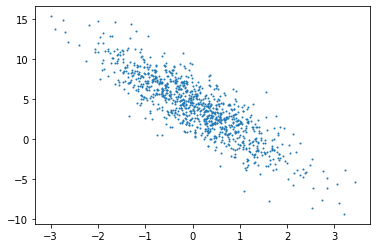

In [47]:
plt.scatter(features[:,1].detach().numpy(),
           labels.detach().numpy(), 1)
plt.show()

In [48]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
    
batch_size = 10
for X,y in data_iter(batch_size, features, labels):
    print(X,"\n", y)
    break

tensor([[ 0.1875, -0.7577],
        [ 0.2800,  1.1321],
        [ 0.0445,  0.1722],
        [-0.4010,  1.6218],
        [ 1.5255,  1.2317],
        [-0.2405, -1.2635],
        [-0.9516,  0.3220],
        [-1.2310,  0.9001],
        [-1.2617,  0.5920],
        [ 0.6162,  1.0544]]) 
 tensor([[ 7.1473],
        [ 0.8941],
        [ 3.6948],
        [-2.1147],
        [ 3.0556],
        [ 8.0275],
        [ 1.1986],
        [-1.3307],
        [-0.3549],
        [ 1.8489]])


In [49]:
w = torch.normal(0 ,0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [50]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [51]:
# y_hat 是一个数组 而y是一个列向量 因此需要reshape
def squared_loss(y_hat, y):
    return (y_hat-y.reshape(y_hat.shape))**2 / 2

In [52]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr*param.grad/batch_size
            param.grad.zero_()

In [54]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w,b], lr, batch_size)
    with torch.no_grad():
        train_1 = loss(net(features, w, b), labels)
        print(f'epoch {epoch+1}, loss {float(train_1.mean()):f}')

epoch 1, loss 0.00
epoch 2, loss 0.00
epoch 3, loss 0.00
